#### Predicting House Prices in California

**For our project, we'll focus on predicting house prices, a classic example of a regression problem.
**Data Source: We'll use the California Housing Prices dataset from the StatLib repository, which is also available in Kaggle.
**Data Format:
  * include longitude, latitude, housingMedianAge, totalRooms, totalBedrooms, population, households, medianIncome, and medianHouseValue.
  * The dataset is in CSV (Comma Separated Values) format, which is straightforward to read and process in Python.
**Supervised Learning for Price Prediction:
  * We'll be using supervised learning, specifically linear regression, to predict house prices.
**Linear Regression Refresher:
  * A statistical method used to predict a dependent variable (house price) from independent variables (like location, size, etc.).
  * Assumes a linear relationship between the input features and the target variable.

In [53]:
# Importing necessary libraries
import numpy as np # Used for numerical operations, especially on arrays and matrices.
import pandas as pd # Essential for data processing and reading CSV files.
import matplotlib.pyplot as plt # For plotting graphs and charts.
import seaborn as sns # Provides a high-level interface for drawing attractive and informative statistical graphics.
import sklearn
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score



housing_data = pd.read_csv("Data/housing.csv")        
print(housing_data.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


#### Preparing and Preprocessing Data

In [54]:
# Identify which cells have null values
print(housing_data.isnull().sum())

# Tells the size of the 2d array/tuple
print("Dimensions :", housing_data.shape)

# Calculate the % of missing data
print("Percentage of nulls for column `total_bedrooms` :", housing_data["total_bedrooms"].isnull().sum()/housing_data.shape[0]*100)


# Steps to handle missing data
## 1. Identify columns which has missing data as separate data frame
## 2. Use the KNNImputer to add missing data to this data frame
## 3. Convert the imputer output array back to dataframe using column names from step #1
## 4. Overlay the new columns which doesn't have any missing data on original data


## 1. Identify columns which has missing data as separate data frame

missing_data = housing_data.loc[:,housing_data.isnull().any()]

## 2. Use the KNNImputer to add missing data to this data frame

# Initializing KNNImputer with 3 neighbors
imputer = KNNImputer(n_neighbors=3)

# Applying imputation returns nd array
transformed_data_array = imputer.fit_transform(missing_data)

## 3. Convert the imputer output array back to dataframe using column names from step #1

transformed_data = pd.DataFrame(data = transformed_data_array, columns = missing_data.columns)
transformed_data.isnull().sum()

## 4. Overlay the new columns which doesn't have any missing data on original data

for column in missing_data.columns: 
    housing_data[column] = transformed_data.replace(housing_data[column],housing_data[column])

print("After imputation : ", housing_data.isnull().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64
Dimensions : (20640, 10)
Percentage of nulls for column `total_bedrooms` : 1.002906976744186
After imputation :  longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


#### Visualizing Data

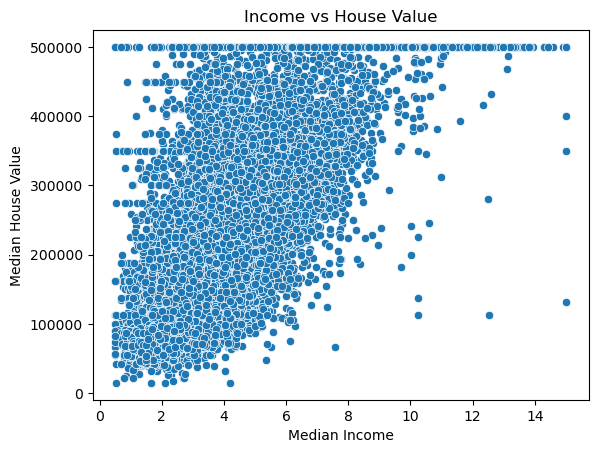

In [55]:
# Scatter plot of 'median_income' vs 'median_house_value'
sns.scatterplot(x='median_income', y='median_house_value', data=housing_data)
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Income vs House Value')
plt.show()

#### Histogram
**Purpose: Useful for observing the distribution of a single numerical variable.

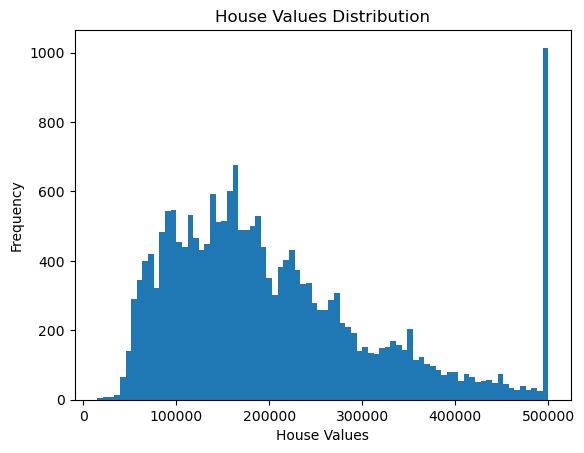

In [56]:

plt.hist(housing_data["median_house_value"], bins=80)
plt.xlabel("House Values")
plt.ylabel("Frequency")
plt.title("House Values Distribution")
plt.show()

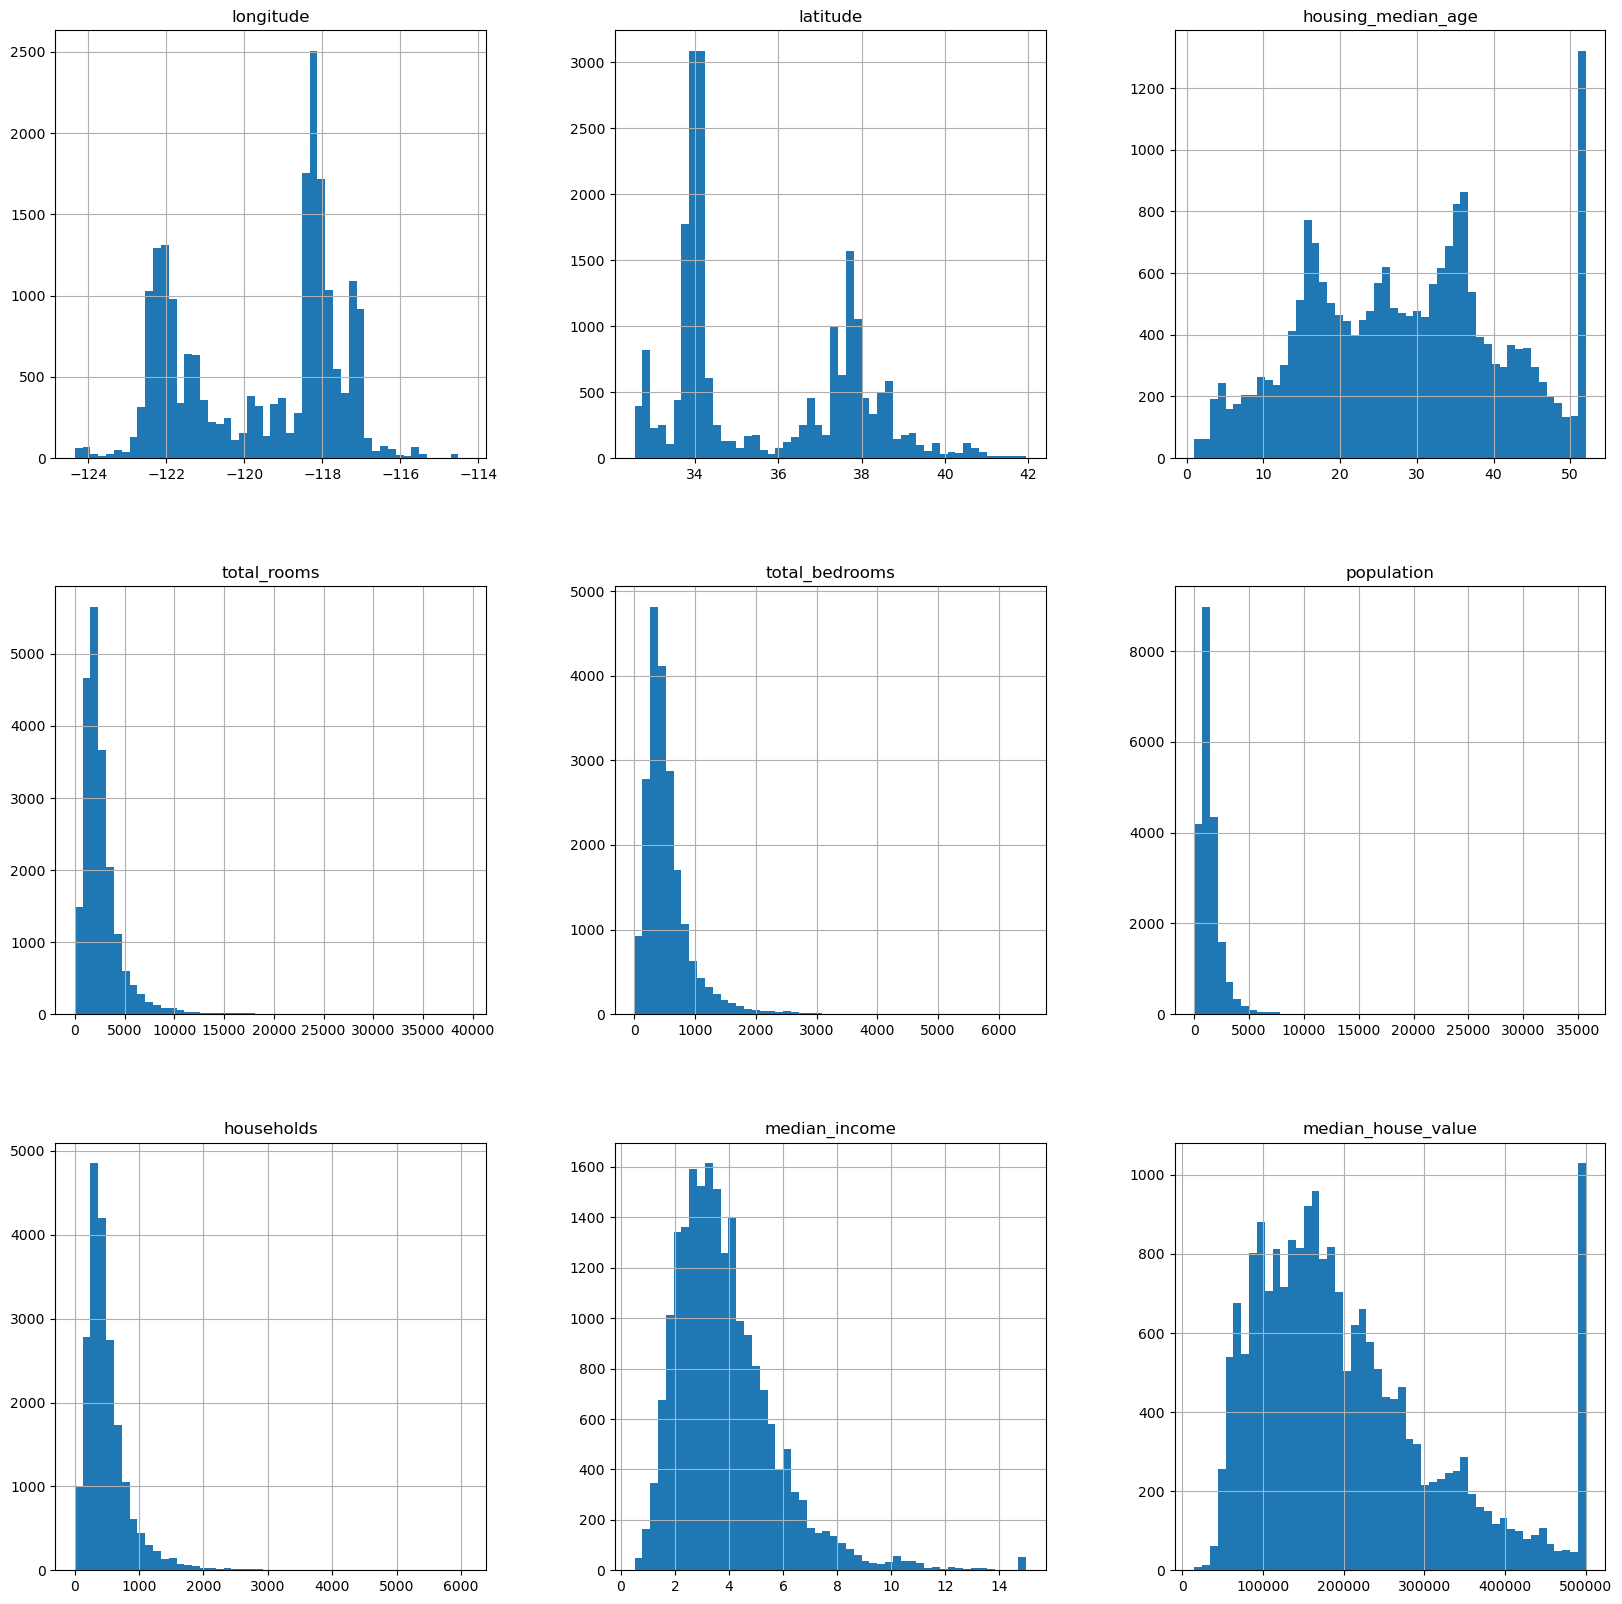

In [57]:
# Generating histograms for all numerical columns in the dataset
# 'bins=50' sets the number of bins in the histogram
# 'figsize=(20,20)' specifies the size of the figure (width, height) in inches
housing_data.hist(bins=50, figsize=(20,20))

# The histograms help in visualizing the distribution of each numerical column
# It's useful to notice any outliers, as indicated in the comment
# Adjusting the number of bins can provide different perspectives on the data's distribution
plt.show() # Displays the plot

# Notice the outlier on the right.
# You can adjust bins to to visual and understand the peaks.


#### Box Plot

**Purpose: Good for visualizing the distribution of a variable and identifying outliers.

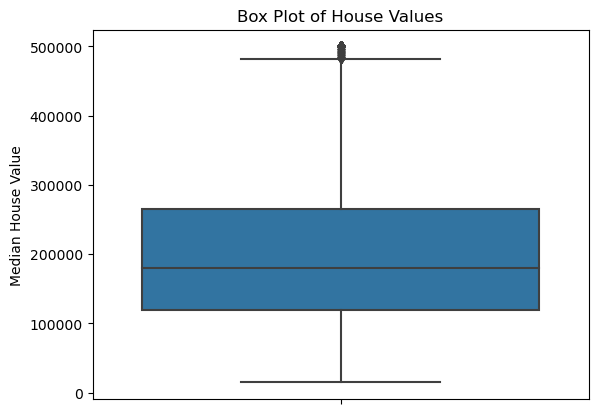

In [58]:
sns.boxplot(y='median_house_value', data=housing_data)
plt.ylabel('Median House Value')
plt.title('Box Plot of House Values')
plt.show()

#### Correlation Heatmap

**Purpose: To observe the correlation between different variables.

In [59]:
pip install pandas seaborn matplotlib

Note: you may need to restart the kernel to use updated packages.


#### Feature Engineering and  Categorical Data Encoding

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   housing_median_age        20640 non-null  float64
 1   median_income             20640 non-null  float64
 2   median_house_value        20640 non-null  float64
 3   ocean_proximity           20640 non-null  object 
 4   rooms_per_household       20640 non-null  float64
 5   bedrooms_per_room         20640 non-null  float64
 6   population_per_household  20640 non-null  float64
 7   coords                    20640 non-null  float64
dtypes: float64(7), object(1)
memory usage: 1.3+ MB


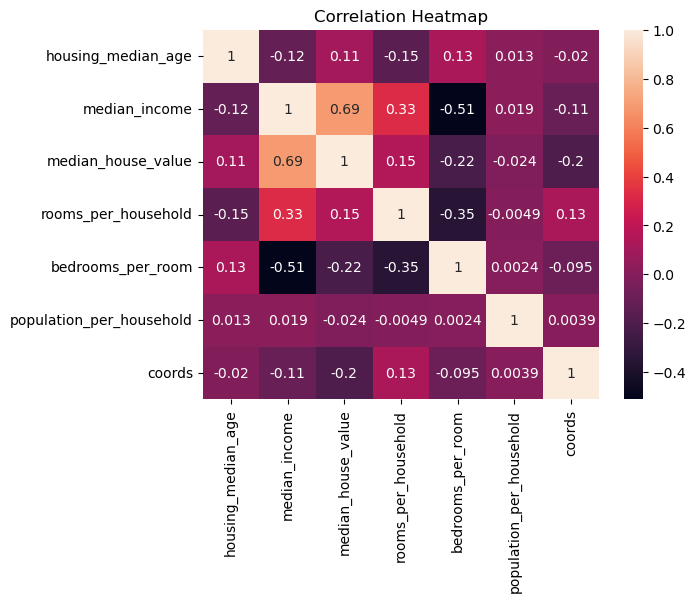

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   housing_median_age          20640 non-null  float64
 1   median_income               20640 non-null  float64
 2   median_house_value          20640 non-null  float64
 3   rooms_per_household         20640 non-null  float64
 4   bedrooms_per_room           20640 non-null  float64
 5   population_per_household    20640 non-null  float64
 6   coords                      20640 non-null  float64
 7   ocean_proximity__1h_ocean   20640 non-null  bool   
 8   ocean_proximity_inland      20640 non-null  bool   
 9   ocean_proximity_island      20640 non-null  bool   
 10  ocean_proximity_near_bay    20640 non-null  bool   
 11  ocean_proximity_near_ocean  20640 non-null  bool   
dtypes: bool(5), float64(7)
memory usage: 1.2 MB


In [63]:
# Reading the dataset
housing_data = pd.read_csv("Data/housing.csv")
missing_data = housing_data.loc[:,housing_data.isnull().any()]
imputer = KNNImputer(n_neighbors=3)
transformed_data_array = imputer.fit_transform(missing_data)
transformed_data = pd.DataFrame(data = transformed_data_array, columns = missing_data.columns)
for column in missing_data.columns: 
    housing_data[column] = transformed_data.replace(housing_data[column],housing_data[column])


# We will add some features and remove some to see the impact on correlation

housing_data["rooms_per_household"] = housing_data["total_rooms"]/housing_data["households"]
housing_data["bedrooms_per_room"] = housing_data["total_bedrooms"]/housing_data["total_rooms"]
housing_data["population_per_household"] = housing_data["population"]/housing_data["households"]
housing_data["coords"] = housing_data["longitude"]/housing_data["latitude"]

# We will remove total_rooms, total_bedrooms, population, households, latitude and longitude

housing_data = housing_data.drop("total_rooms", axis=1)
housing_data = housing_data.drop("total_bedrooms", axis=1)
housing_data = housing_data.drop("households", axis=1)
housing_data = housing_data.drop("population", axis=1)
housing_data = housing_data.drop("longitude", axis=1)
housing_data = housing_data.drop("latitude", axis=1)

housing_data.info()

correlation_matrix = housing_data.corr(numeric_only=True)

# Visualizing the correlation matrix using a heatmap in Seaborn
# 'annot=True' annotates the heatmap with correlation values for easy understanding
sns.heatmap(correlation_matrix, annot=True)

# Setting the title for the heatmap
plt.title('Correlation Heatmap')

# Displaying the plot
plt.show()

# Categorical Data Encoding using one hot encoding method

housing_data =  pd.get_dummies(housing_data, columns=['ocean_proximity'])

# Use List Comprehension to change columns names to remove special char/space to avoid issues
housing_data.columns = [c.lower().replace(' ','_').replace('<','_') for c in housing_data.columns]


housing_data.info()

#### Using Linear Regression to Predict Home Selling Price


In [64]:


# Reading the dataset
housing_data = pd.read_csv("Data/housing.csv")
missing_data = housing_data.loc[:,housing_data.isnull().any()]
imputer = KNNImputer(n_neighbors=3)
transformed_data_array = imputer.fit_transform(missing_data)
transformed_data = pd.DataFrame(data = transformed_data_array, columns = missing_data.columns)
for column in missing_data.columns: 
    housing_data[column] = transformed_data.replace(housing_data[column],housing_data[column])


# We will add some features and remove some to see the impact on correlation

housing_data["rooms_per_household"] = housing_data["total_rooms"]/housing_data["households"]
housing_data["bedrooms_per_room"] = housing_data["total_bedrooms"]/housing_data["total_rooms"]
housing_data["population_per_household"] = housing_data["population"]/housing_data["households"]
housing_data["coords"] = housing_data["longitude"]/housing_data["latitude"]

# We will remove total_rooms, total_bedrooms, population, households, latitude and longitude

housing_data = housing_data.drop("total_rooms", axis=1)
housing_data = housing_data.drop("total_bedrooms", axis=1)
housing_data = housing_data.drop("households", axis=1)
housing_data = housing_data.drop("population", axis=1)
housing_data = housing_data.drop("longitude", axis=1)
housing_data = housing_data.drop("latitude", axis=1)

# Categorical Data Encoding using one hot encoding method

housing_data =  pd.get_dummies(housing_data, columns=['ocean_proximity'])

# Use List Comprehension to change columns names to remove special char/space to avoid issues
housing_data.columns = [c.lower().replace(' ','_').replace('<','_') for c in housing_data.columns]

housing_data.info()

# Select your features and target variable
X = housing_data[['housing_median_age','median_income','rooms_per_household','bedrooms_per_room','population_per_household','coords','ocean_proximity__1h_ocean','ocean_proximity_inland','ocean_proximity_island','ocean_proximity_near_bay','ocean_proximity_near_ocean']] 
y = housing_data['median_house_value']

# Split the data 70:30 - 70% will be used to train the model and 30% will be used to test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=True, test_size=0.3)


# Using Scikit-learn liner regression

# Create a linear regression model
model = LinearRegression()

# List all available hyper parameters
print("Hyper parameters:", model.get_params())

# Train the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
# R^2 score - value closer to 1 indicates model is close to perfection. 
print('-----------------------------')
print("Linear Regression Test Accuracy:",model.score(X_test,y_test))
print("R^2 Accuracy:", r2_score(y_test, predictions))
print(pd.DataFrame({'Actual':y_test, 'Predicted':predictions}))
print("Root Mean Squared Error:", mean_squared_error(y_test, predictions)**(0.5))
print('-----------------------------')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   housing_median_age          20640 non-null  float64
 1   median_income               20640 non-null  float64
 2   median_house_value          20640 non-null  float64
 3   rooms_per_household         20640 non-null  float64
 4   bedrooms_per_room           20640 non-null  float64
 5   population_per_household    20640 non-null  float64
 6   coords                      20640 non-null  float64
 7   ocean_proximity__1h_ocean   20640 non-null  bool   
 8   ocean_proximity_inland      20640 non-null  bool   
 9   ocean_proximity_island      20640 non-null  bool   
 10  ocean_proximity_near_bay    20640 non-null  bool   
 11  ocean_proximity_near_ocean  20640 non-null  bool   
dtypes: bool(5), float64(7)
memory usage: 1.2 MB
Hyper parameters: {'copy_X': True, 'fit_inte

#### Using Random Forest Regression

In [65]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score



# Create a random forest regressor
# Optional params - n_estimators=10,random_state=10 => gives accurary of 0.75
# Default accurary => 0.77
model = RandomForestRegressor()

# List all available hyper parameters
print("Hyper parameters:", model.get_params())


# Train the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
# R^2 score - value closer to 1 indicates model is close to perfection. 
print('-----------------------------')
print("Random Forest Regressor Test Accuracy:",model.score(X_test,y_test))
print("R^2 Accuracy:", r2_score(y_test, predictions))
print(pd.DataFrame({'Actual':y_test, 'Predicted':predictions}))
print("Root Mean Squared Error:", mean_squared_error(y_test, predictions)**(0.5))
print('-----------------------------')

Hyper parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
-----------------------------
Random Forest Regressor Test Accuracy: 0.7799154006194291
R^2 Accuracy: 0.7799154006194291
         Actual  Predicted
20046   47700.0   51046.00
3024    45800.0   86649.00
15663  500001.0  449543.34
20484  218600.0  272174.00
9814   278000.0  239127.01
...         ...        ...
17505  237500.0  246203.01
13512   67300.0   69769.00
10842  218400.0  214845.01
16559  119400.0  131539.00
5786   209800.0  219975.00

[6192 rows x 2 columns]
Root Mean Squared Error: 53746.61513054988
-----------------------------


#### Using xgboost's XGBRegressor

In [66]:
from xgboost import XGBRegressor

# Create a XGBRegressor
model = XGBRegressor()

# List all available hyper parameters
print("Hyper parameters:", model.get_params())


# Train the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
# R^2 score - value closer to 1 indicates model is close to perfection. 
print('-----------------------------')
print("XGBRegressor Test Accuracy:",model.score(X_test,y_test))
print("R^2 Accuracy:", r2_score(y_test, predictions))
print(pd.DataFrame({'Actual':y_test, 'Predicted':predictions}))
print("Root Mean Squared Error:", mean_squared_error(y_test, predictions)**(0.5))
print('-----------------------------')

Hyper parameters: {'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}
-----------------------------
XGBRegressor Test Accuracy: 0.7742896789627469
R^2 

#### Determine Feature Importance
**We will identify and use top 5 features to retrain the model and observe changes in R^2 accuracy.

<Axes: >

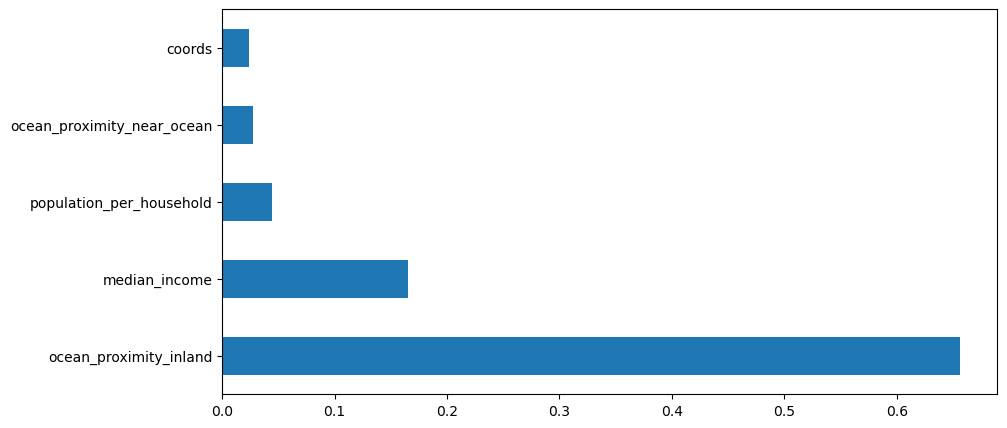

In [67]:
# Determine which features are important based on model learning
plt.figure(figsize=(10,5))
feat_importances = pd.Series(model.feature_importances_, index = X_train.columns)
feat_importances.nlargest(5).plot(kind='barh')

#### Retrain with top 5 important features

In [68]:
# Create a random forest regressor
# Optional params - n_estimators=10,random_state=10 => gives accurary of 0.75
# Default accurary => 0.77
model = RandomForestRegressor(n_estimators=10,random_state=10)

# Train the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
# R^2 score - value closer to 1 indicates model is close to perfection. 
print('-----------------------------')
print("Random Forest Regressor Test Accuracy:",model.score(X_test,y_test))
print("R^2 Accuracy:", r2_score(y_test, predictions))
print(pd.DataFrame({'Actual':y_test, 'Predicted':predictions}))
print("Mean Squared Error:", mean_squared_error(y_test, predictions)**(0.5))
print('-----------------------------')

-----------------------------
Random Forest Regressor Test Accuracy: 0.7584361627978977
R^2 Accuracy: 0.7584361627978977
         Actual  Predicted
20046   47700.0    53510.0
3024    45800.0    96990.0
15663  500001.0   442670.3
20484  218600.0   259180.0
9814   278000.0   246620.0
...         ...        ...
17505  237500.0   241580.1
13512   67300.0    72000.0
10842  218400.0   202330.0
16559  119400.0   129890.0
5786   209800.0   206380.0

[6192 rows x 2 columns]
Mean Squared Error: 56308.27869196303
-----------------------------


#### Hyper parameter Tuning

In [69]:
# Using XGboost XGBRegressor

model = XGBRegressor(
                    #booster='dart',
#                     gamma=0.05,
                    learning_rate=0.3,
                    max_depth=6,
                     n_estimators=1000,
                     n_jobs=16,
#                     objective='reg:squarederror',
#                     subsample=0.8,
#                     scale_pos_weight=0,
#                     reg_alpha=0,
#                     reg_lambda=1,
#                     verbosity=1
)

print("Hyperparameters : ", model.get_params())

# Train the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
# R^2 score - value closer to 1 indicates model is close to perfection. 
print('-----------------------------')
print("XGBRegressor Test Accuracy:",model.score(X_test,y_test))
print("R^2 Accuracy:", r2_score(y_test, predictions))
print(pd.DataFrame({'Actual':y_test, 'Predicted':predictions}))
print("Mean Squared Error:", mean_squared_error(y_test, predictions)**(0.5))
print('-----------------------------')

Hyperparameters :  {'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.3, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 6, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 1000, 'n_jobs': 16, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}
-----------------------------
XGBRegressor Test Accuracy: 0.7550981171278359
R^2 Accur